<a href="https://colab.research.google.com/github/garfield-gray/Soft-Computing/blob/main/DimentionReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimention Reduction Has two major branch

# 1- SVD


In [1]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
im = plt.imread("drive/MyDrive/Uni/LAandOptimization/dimentionReduction/lena.jpg", ".jpg")
gray = im@np.array([1/3,1/3,1/3])

Mounted at /content/drive


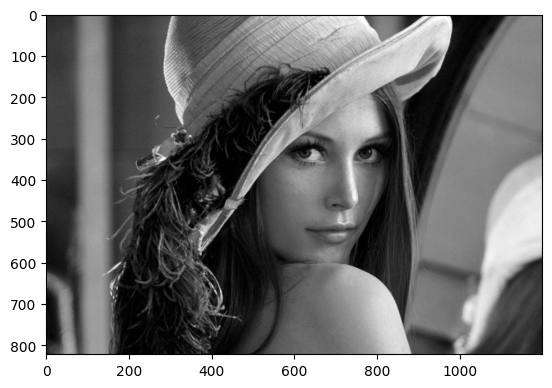

In [ ]:
plt.imshow(gray, cmap='gray')
plt.show()

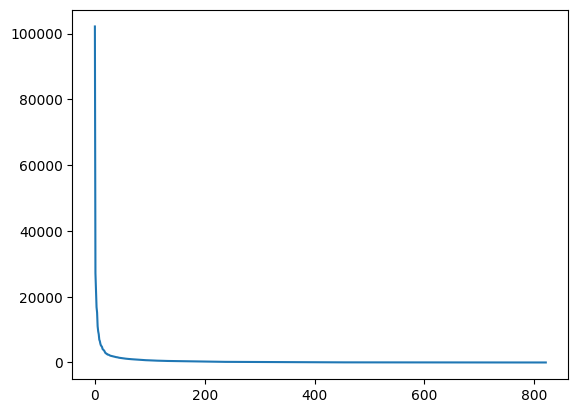

In [ ]:
u, s, vh = np.linalg.svd(gray)
plt.plot(s)
plt.show()

In [ ]:
print(s.shape)
cut = np.zeros([s.shape[0], s.shape[0]])
for i in range(200):
  cut[i,i] = 1
s = s@cut
print(s.shape)
cut.shape

(822,)
(822,)


(822, 822)

In [ ]:
newIm = u@np.hstack((np.diag(s), np.zeros([u.shape[0], vh.shape[0]-u.shape[0]])))@vh

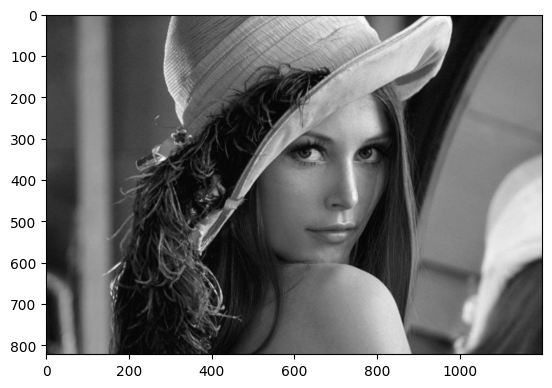

In [ ]:
plt.imshow(newIm, cmap='gray')
plt.show()

# 2-PCA

In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')

print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [27]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from numpy import array,hstack,ones,zeros,arange,random,exp

data = datasets.load_iris()
D = data.data
Dr = PCA(0.9).fit_transform(D)
# Dr = D
n,d = Dr.shape
k = 3

dict = {0:[1,0,0],
        1:[0,1,0],
        2:[0,0,1]}
Y = array(list(map(lambda x:dict[x],data.target)))
X = hstack((ones((n,1)),Dr))

W0 = zeros((k,d+1))
W = W0.copy()

eta,eps = 0.005,1e-4
epoch = 1

import time
t = time.time()

while True:
    ii = arange(n)
    random.shuffle(ii)
    for i in ii:
        W[:2] = W0[:2] + eta*((Y[i]-exp(W0@X[i])/sum(exp(W0@X[i]))).reshape((k,1))*X[i].reshape((1,d+1)))[:2]
        chg = np.all(abs(W[:2]-W0[:2])) < eps
        W0 = W.copy()
    epoch += 1
    if (chg) | (epoch > 1e3): break
print(time.time()-t)
print(W.round(3))

4.84262752532959
[[-0.673 -8.261]
 [ 5.108 -4.025]
 [ 0.     0.   ]]


In [66]:
i = 120
((exp(W@X[i:i+10].T)/np.sum(exp(W@X[i:i+10].T), axis = 0)).round(0).T) == Y[i:i+10]

array([[ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [35]:
Yc = ((exp(W@X.T)/sum(exp(W@X.T))).round(0).T)

In [78]:
co = 0
for i in range(150):
  if (Yc[i] != Y[i]).any():
    co +=1
co

10

In [38]:
np.matmul(W, X[7:12].T)

array([[21.02100878, 23.17073615, 21.40604347, 20.03635939, 20.9104011 ],
       [15.67962621, 16.7271837 , 15.86725278, 15.1998087 , 15.62572733],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [47]:
np.sum(exp(X[7:12]@W.T), axis = 1)

array([1.35326577e+09, 1.15774564e+10, 1.98714952e+09, 5.07122150e+08,
       1.21190215e+09])

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
D.shape

(150, 4)

In [ ]:
Dr.shape

(150, 1)

In [ ]:
print(D[50], D[79])

[7.  3.2 4.7 1.4] [5.7 2.6 3.5 1. ]


In [ ]:
Dr[50], Dr[79]

(array([7. , 3.2, 4.7, 1.4]), array([5.7, 2.6, 3.5, 1. ]))

In [114]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from numpy import array,hstack,ones,zeros,arange,random,exp




data = datasets.load_wine()
D = data.data
# Dr = PCA(0.9).fit_transform(D)
Dr = D
n,d = Dr.shape
k = 3

dict = {0:[1,0,0],
        1:[0,1,0],
        2:[0,0,1]}
Y = array(list(map(lambda x:dict[x],data.target)))
X = hstack((ones((n,1)),Dr))

W0 = zeros((k,d+1), dtype=np.float128)
W = W0.copy()

eta,eps = 0.005,1e-4
epoch = 1

import time
t = time.time()

while True:
    ii = arange(n)
    random.shuffle(ii)
    for i in ii:
        W[:2] = W0[:2] + eta*((Y[i]-exp(W0@X[i])/sum(exp(W0@X[i]))).reshape((k,1))*X[i].reshape((1,d+1)))[:2]
        chg = np.all(abs(W[:2]-W0[:2])) < eps
        W0 = W.copy()
    epoch += 1
    if (chg) | (epoch > 1e3): break
print(time.time()-t)
print(W.round(3))

0.0195925235748291
[[-1.2700e-01 -1.4530e+00 -3.6000e-01 -2.8000e-01 -3.1140e+00 -1.0907e+01
  -1.6400e-01 -2.0000e-02 -6.7000e-02 -1.3300e-01 -4.4800e-01 -9.9000e-02
  -2.1400e-01 -8.5000e-01]
 [ 9.1000e-02  9.5300e-01  7.0000e-03  1.7700e-01  1.9250e+00  7.3090e+00
   2.1200e-01  2.2700e-01  3.3000e-02  1.6400e-01 -2.5600e-01  1.3000e-01
   3.3400e-01 -1.1890e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  0.0000e+00]]


In [115]:
i = 120
((exp(W@X[i:i+10].T)/np.sum(exp(W@X[i:i+10].T), axis = 0)).round(0).T) == Y[i:i+10]

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False]])

In [116]:
Yc = ((exp(W@X.T)/sum(exp(W@X.T))).round(0).T)

In [117]:
co = 0
for i in range(150):
  if (Yc[i] != Y[i]).any():
    co +=1
co

87

In [113]:
Y.shape

(178, 3)